Training Logistic Regression model...
Training completed in 46.67 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.76      0.86    394179
           1       0.11      0.84      0.19     13794

    accuracy                           0.76    407973
   macro avg       0.55      0.80      0.53    407973
weighted avg       0.96      0.76      0.84    407973



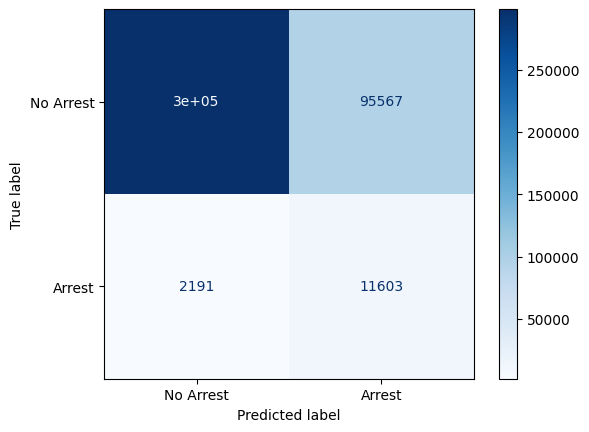

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import time
import joblib

# Load data
X_train = joblib.load('X_train_audit.pkl')
X_test = joblib.load('X_test_audit.pkl')
y_train = joblib.load('y_train_audit.pkl')
y_test = joblib.load('y_test_audit.pkl')
preprocessor = joblib.load('preprocessor_audit.pkl')

# Build pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        class_weight='balanced',
        solver='saga',
        max_iter=1000,
        random_state=42
    ))
])

# Train and evaluate
print("Training Logistic Regression model...")
start = time.time()
model.fit(X_train, y_train)
end = time.time()
print(f"Training completed in {end - start:.2f} seconds")

y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["No Arrest", "Arrest"], cmap='Blues')
